# Base model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


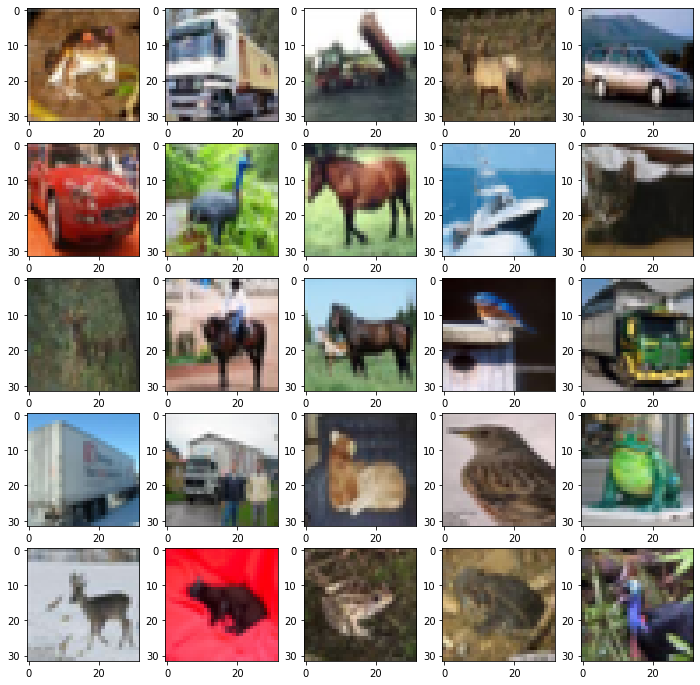

In [3]:
plt.figure(figsize = (12, 12))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i])

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [6]:
import os, random

def reset_seed(seed = 0):
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [7]:
from tensorflow.keras import models, layers

In [8]:
reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [9]:
batch_size = 1024
epochs = 50

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test))

Epoch 1/50
49/49 [==============================] - 34s 67ms/step - loss: 2.1073 - accuracy: 0.2193 - val_loss: 1.6719 - val_accuracy: 0.3986
Epoch 2/50
49/49 [==============================] - 2s 44ms/step - loss: 1.6082 - accuracy: 0.4266 - val_loss: 1.4335 - val_accuracy: 0.4877
Epoch 3/50
49/49 [==============================] - 2s 44ms/step - loss: 1.4186 - accuracy: 0.4932 - val_loss: 1.3356 - val_accuracy: 0.5247
Epoch 4/50
49/49 [==============================] - 2s 44ms/step - loss: 1.3213 - accuracy: 0.5349 - val_loss: 1.2446 - val_accuracy: 0.5552
Epoch 5/50
49/49 [==============================] - 2s 45ms/step - loss: 1.2141 - accuracy: 0.5693 - val_loss: 1.1727 - val_accuracy: 0.5893
Epoch 6/50
49/49 [==============================] - 2s 44ms/step - loss: 1.1412 - accuracy: 0.6015 - val_loss: 1.1835 - val_accuracy: 0.5874
Epoch 7/50
49/49 [==============================] - 2s 45ms/step - loss: 1.0881 - accuracy: 0.6218 - val_loss: 1.1057 - val_accuracy: 0.6153
Epoch 8/50
4

In [10]:
results = pd.DataFrame(history.history)

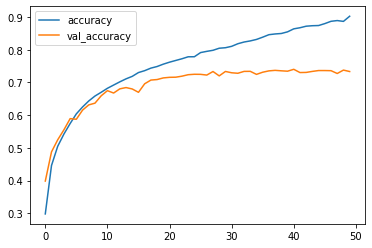

In [11]:
results[['accuracy', 'val_accuracy']].plot()

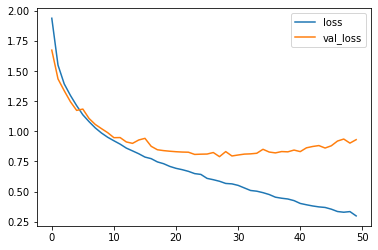

In [12]:
results[['loss', 'val_loss']].plot()

In [13]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.29849,0.9021,0.930203,0.7332


# Dropout

In [14]:
reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dropout(0.5),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [15]:
batch_size = 1024
epochs = 50

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test))

Epoch 1/50
49/49 [==============================] - 3s 50ms/step - loss: 2.1148 - accuracy: 0.2137 - val_loss: 1.6519 - val_accuracy: 0.4068
Epoch 2/50
49/49 [==============================] - 2s 46ms/step - loss: 1.6208 - accuracy: 0.4151 - val_loss: 1.4252 - val_accuracy: 0.4886
Epoch 3/50
49/49 [==============================] - 2s 46ms/step - loss: 1.4374 - accuracy: 0.4824 - val_loss: 1.3087 - val_accuracy: 0.5261
Epoch 4/50
49/49 [==============================] - 2s 46ms/step - loss: 1.3392 - accuracy: 0.5204 - val_loss: 1.2191 - val_accuracy: 0.5658
Epoch 5/50
49/49 [==============================] - 2s 46ms/step - loss: 1.2383 - accuracy: 0.5589 - val_loss: 1.1354 - val_accuracy: 0.6077
Epoch 6/50
49/49 [==============================] - 2s 46ms/step - loss: 1.1680 - accuracy: 0.5848 - val_loss: 1.1195 - val_accuracy: 0.6050
Epoch 7/50
49/49 [==============================] - 2s 46ms/step - loss: 1.1162 - accuracy: 0.6041 - val_loss: 1.0414 - val_accuracy: 0.6413
Epoch 8/50
49

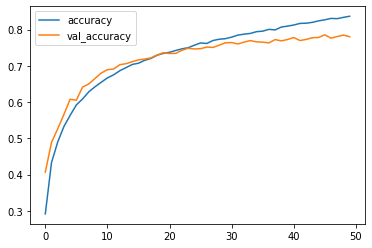

In [16]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

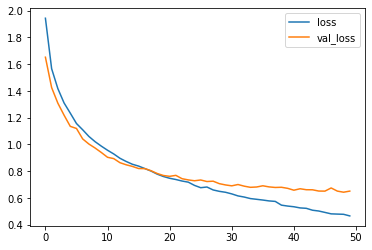

In [17]:
results[['loss', 'val_loss']].plot()

In [18]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.466262,0.8366,0.651586,0.7801


# Regularization

In [19]:
from tensorflow.keras import regularizers

In [37]:
reset_seed(0)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer = regularizers.l2(1e-2), input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer = regularizers.l2(1e-2)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding='same', kernel_regularizer = regularizers.l2(1e-2)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [38]:
batch_size = 1024
epochs = 50

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test))

Epoch 1/50
49/49 [==============================] - 3s 51ms/step - loss: 3.0613 - accuracy: 0.1982 - val_loss: 2.1100 - val_accuracy: 0.3687
Epoch 2/50
49/49 [==============================] - 2s 44ms/step - loss: 2.0278 - accuracy: 0.3832 - val_loss: 1.8475 - val_accuracy: 0.4192
Epoch 3/50
49/49 [==============================] - 2s 44ms/step - loss: 1.8038 - accuracy: 0.4390 - val_loss: 1.7316 - val_accuracy: 0.4573
Epoch 4/50
49/49 [==============================] - 2s 45ms/step - loss: 1.7220 - accuracy: 0.4608 - val_loss: 1.6358 - val_accuracy: 0.4870
Epoch 5/50
49/49 [==============================] - 2s 45ms/step - loss: 1.6199 - accuracy: 0.4948 - val_loss: 1.6047 - val_accuracy: 0.4981
Epoch 6/50
49/49 [==============================] - 2s 44ms/step - loss: 1.5892 - accuracy: 0.5035 - val_loss: 1.5628 - val_accuracy: 0.5067
Epoch 7/50
49/49 [==============================] - 2s 45ms/step - loss: 1.5288 - accuracy: 0.5263 - val_loss: 1.4885 - val_accuracy: 0.5418
Epoch 8/50
49

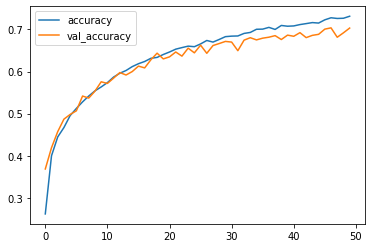

In [39]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

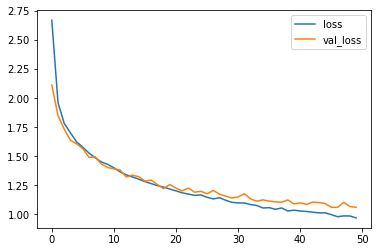

In [40]:
results[['loss', 'val_loss']].plot()

In [41]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.968498,0.73112,1.059247,0.7031


# Early stopping

In [42]:
reset_seed(0)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [43]:
batch_size = 1024
epochs = 50

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test),
                    callbacks = [callback])

Epoch 1/50
49/49 [==============================] - 3s 49ms/step - loss: 2.1072 - accuracy: 0.2191 - val_loss: 1.6753 - val_accuracy: 0.4013
Epoch 2/50
49/49 [==============================] - 2s 44ms/step - loss: 1.6058 - accuracy: 0.4294 - val_loss: 1.4319 - val_accuracy: 0.4897
Epoch 3/50
49/49 [==============================] - 2s 44ms/step - loss: 1.4165 - accuracy: 0.4936 - val_loss: 1.3275 - val_accuracy: 0.5347
Epoch 4/50
49/49 [==============================] - 2s 44ms/step - loss: 1.3269 - accuracy: 0.5320 - val_loss: 1.2546 - val_accuracy: 0.5539
Epoch 5/50
49/49 [==============================] - 2s 45ms/step - loss: 1.2225 - accuracy: 0.5689 - val_loss: 1.1806 - val_accuracy: 0.5868
Epoch 6/50
49/49 [==============================] - 2s 45ms/step - loss: 1.1440 - accuracy: 0.5988 - val_loss: 1.1755 - val_accuracy: 0.5865
Epoch 7/50
49/49 [==============================] - 2s 44ms/step - loss: 1.0889 - accuracy: 0.6206 - val_loss: 1.1175 - val_accuracy: 0.6092
Epoch 8/50
49

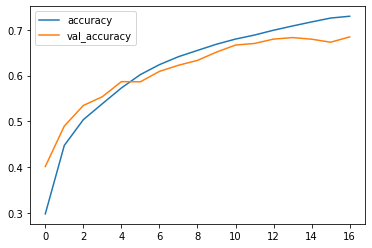

In [44]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

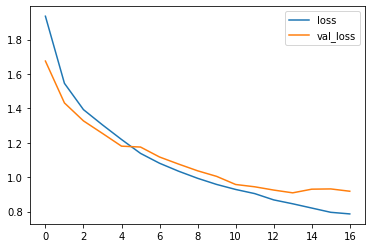

In [45]:
results[['loss', 'val_loss']].plot()


In [46]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
16,0.786738,0.72978,0.918501,0.6846


# Batch normalization

In [47]:
reset_seed(0)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [48]:
batch_size = 1024
epochs = 50

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test))

Epoch 1/50
49/49 [==============================] - 4s 65ms/step - loss: 2.1332 - accuracy: 0.3349 - val_loss: 3.9090 - val_accuracy: 0.1000
Epoch 2/50
49/49 [==============================] - 3s 61ms/step - loss: 1.1999 - accuracy: 0.5754 - val_loss: 6.3962 - val_accuracy: 0.1000
Epoch 3/50
49/49 [==============================] - 3s 61ms/step - loss: 0.9586 - accuracy: 0.6593 - val_loss: 5.7570 - val_accuracy: 0.1000
Epoch 4/50
49/49 [==============================] - 3s 61ms/step - loss: 0.8211 - accuracy: 0.7121 - val_loss: 4.0308 - val_accuracy: 0.1481
Epoch 5/50
49/49 [==============================] - 3s 60ms/step - loss: 0.6936 - accuracy: 0.7580 - val_loss: 3.3414 - val_accuracy: 0.2226
Epoch 6/50
49/49 [==============================] - 3s 61ms/step - loss: 0.6014 - accuracy: 0.7905 - val_loss: 3.1248 - val_accuracy: 0.2241
Epoch 7/50
49/49 [==============================] - 3s 60ms/step - loss: 0.5084 - accuracy: 0.8274 - val_loss: 2.8474 - val_accuracy: 0.2638
Epoch 8/50
49

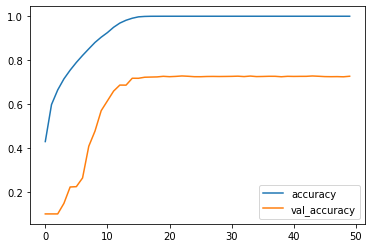

In [49]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

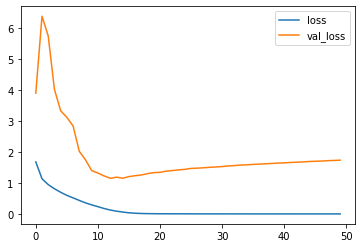

In [50]:
results[['loss', 'val_loss']].plot()

In [52]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.000509,1.0,1.739136,0.7268


# Activation function

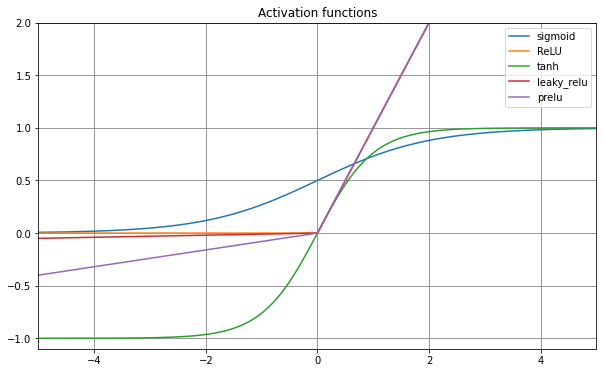

In [60]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def tanh(x):
  return np.tanh(x)

def leaky_relu(X):
  return np.maximum(x, 0.01 * x)

def prelu(x, a):
  return np.maximum(x, a * x)

fig = plt.figure(figsize = (10, 6))
x = np.linspace(-10, 10, 1000)

ax = fig.add_subplot(111)
ax.plot(x, sigmoid(x), label = 'sigmoid')
ax.plot(x, relu(x), label = 'ReLU')
ax.plot(x, tanh(x), label = 'tanh')
ax.plot(x, leaky_relu(x), label = 'leaky_relu')
ax.plot(x, prelu(x, 0.08), label = 'prelu')
ax.set_title('Activation functions')

plt.legend()
plt.xlim(-5, 5)
plt.ylim(-1.1, 2)
plt.grid(color = 'gray', ls = '-')